# In this Notebook we are attempting to predict a persons next N fights

## Library Imports

In [1]:
import sys
sys.path.insert(1, '../combined_data')
sys.path.insert(1, '../predict_winner')
from make_career import make_career
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import talos as ta
from talos.model.normalizers import lr_normalizer
from talos.model.hidden_layers import hidden_layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


## Loading the dataset

In [10]:
features, labels = make_career(pd.read_csv('../combined_data/combined_fight_data_zerod_nans.csv'),
                               N_FIGHT_CAREER=5, 
                               N_FUTURE_LABELS=5)
# labels = labels.reshape(-1,)
# labels = LabelEncoder().fit_transform(labels)

Creating careers using 5 fight intervals and predicting 5 future fights
Original fight data shape: (5062, 154)
Fights 2x shape: (10124, 96)

Features shape: (1561, 5)
Labels shape: (1561, 5)

Features is a 2D matrix with 1561 rows
Each row contains has 5 fights, and each fight has 96 keys

Labels is a 2D matrix with 1561 rows
Each row contains the the prediction for the next 5 fight(s)


In [11]:
print(features.shape)
print(type(features))

(1561, 5)
<class 'numpy.ndarray'>


In [12]:
print(labels.shape)
print(type(labels))

(1561, 5)
<class 'numpy.ndarray'>


In [13]:
for i in features[0]:
    print(i["Winner"])

True
True
True
True
False


In [15]:
print(labels[0])

[ True  True False  True False]


## Preprocess Features

## Generates np.array of shape (3220, 5 * features)

In [200]:
from sklearn.utils import shuffle

def collapse_n_fights():
    num_cols, cat_cols = get_column_types()
    
    # Collect only the features we want
    new_features = []
    for window in features:
        window_arr = list(window.reshape(1,-1))[0]
        fight_window = np.array([])
        for fight in window_arr:
            fight_arr = np.array([fight[i] for i in num_cols])
            np.nan_to_num(fight_arr, copy=False)
            fight_window = np.append(fight_window, fight_arr)
        new_features.append(fight_window)
    
#     new_features, new_labels = shuffle(np.array(new_features), labels)
#     X_train, X_test, y_train, y_test = train_test_split(new_features, new_labels, random_state=0, train_size=0.90)
    
#     # Scale the data
#     scaler = StandardScaler().fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    
#     print("X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
#     print("X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))
    
#     return X_train, X_test, y_train, y_test

### Generates np.array of shape (3220, 5, win?)

## Building a DNN to predict the winner using last n fights

In [ ]:
# Get the data
X_train, X_test, y_train, y_test = collapse_n_fights()

In [ ]:
# Define hyperparameters to use in Grid Search
dnn_params = {'lr': (0.2, 1, 2),
     'first_neuron': [128, 256],
     'hidden_layers': [1, 2],
     'batch_size': [64, 128, 256],
     'epochs': [10, 25],
     'dropout': [0.01, 0.1],
     'optimizer': [Adam],
     'shapes':['funnel'],
     'losses': [binary_crossentropy],
     'activation': [relu],
     'last_activation': [sigmoid]}

In [ ]:
# Create the Neural Network
dnn_model = ta.Scan(x=X_train,
               y=y_train,
               model=get_dnn,
               params=dnn_params,
               experiment_name="UFC_5_Fight_Predictor")

In [ ]:
results_df = dnn_model.data

In [ ]:
top_10_dnn = results_df.sort_values(by=['val_accuracy'], ascending=False).head(10)

In [ ]:
top_10_dnn

In [ ]:
top_10_dnn.to_csv("../model_results/UFC_Predict_5_Fights_DNN.csv")

## Building a CNN to predict the winner using last n fights

In [226]:
# Get the data
X_train, X_test, y_train, y_test = collapse_n_fights()
X_train = X_train.reshape(X_train.shape[0], 10, 85)
X_test = X_test.reshape(X_test.shape[0], 10, 85)

print("New: X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
print("New: X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))

X_train length (1164, 850), y_train length (1164,)
X_test length (130, 850), y_test length (130,)
New: X_train length (1164, 10, 85), y_train length (1164,)
New: X_test length (130, 10, 85), y_test length (130,)


In [241]:
# Define hyperparameters to use in Grid Search
cnn_params = {'lr': [0.01, 0.1, 1],
     'num_filters': [64, 128],
     'kernel_size': [2],
     'batch_size': [64, 128],
     'epochs': [5, 15],
     'dropout': [0.01],
     'flatten_layer': [100, 150], 
     'optimizer': [Adam],
     'losses': [binary_crossentropy],
     'activation': [relu],
     'last_activation': [sigmoid]}

In [242]:
# Create the Neural Network
cnn_model = ta.Scan(x=X_train,
                y=y_train,
                model=get_cnn,
                params=cnn_params,
                experiment_name="UFC_5_Fight_Predictor_CNN")




  0%|          | 0/48 [00:00<?, ?it/s]


  2%|▏         | 1/48 [00:03<02:56,  3.76s/it]


  4%|▍         | 2/48 [00:06<02:41,  3.51s/it]


  6%|▋         | 3/48 [00:09<02:27,  3.28s/it]


  8%|▊         | 4/48 [00:13<02:29,  3.39s/it]


 10%|█         | 5/48 [00:16<02:24,  3.36s/it]


 12%|█▎        | 6/48 [00:20<02:36,  3.74s/it]


 15%|█▍        | 7/48 [00:24<02:27,  3.59s/it]


 17%|█▋        | 8/48 [00:27<02:24,  3.62s/it]


 19%|█▉        | 9/48 [00:31<02:18,  3.55s/it]


 21%|██        | 10/48 [00:34<02:14,  3.54s/it]


 23%|██▎       | 11/48 [00:38<02:07,  3.45s/it]


 25%|██▌       | 12/48 [00:41<02:05,  3.49s/it]


 27%|██▋       | 13/48 [00:45<02:05,  3.58s/it]


 29%|██▉       | 14/48 [00:49<02:10,  3.84s/it]


 31%|███▏      | 15/48 [00:53<02:05,  3.80s/it]


 33%|███▎      | 16/48 [00:57<02:07,  3.98s/it]


 35%|███▌      | 17/48 [01:01<02:01,  3.92s/it]


 38%|███▊      | 18/48 [01:06<02:01,  4.06s/it]


 40%|███▉      | 19/48 [01:10<01:56,  4.02s/it]


 42%|████▏     

In [244]:
results_df = cnn_model.data

In [245]:
top_10_val_cnn = results_df.sort_values(by=['val_accuracy'], ascending=False).head(10)
top_10_acc_cnn = results_df.sort_values(by=['accuracy'], ascending=False).head(10)

In [246]:
top_10_val_cnn

,round_epochs,val_loss,val_accuracy,loss,accuracy,activation,batch_size,dropout,epochs,flatten_layer,kernel_size,last_activation,losses,lr,num_filters,optimizer
3,5,0.685317,0.577143,0.620243,0.686732,<function relu at 0x13c0421e0>,64,0.01,5,100,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,128,<class 'keras.optimizers.Adam'>
38,15,0.687646,0.574286,0.598597,0.727273,<function relu at 0x13c0421e0>,128,0.01,15,100,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,64,<class 'keras.optimizers.Adam'>
27,5,0.688980,0.571429,0.641840,0.638821,<function relu at 0x13c0421e0>,128,0.01,5,100,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,128,<class 'keras.optimizers.Adam'>
9,5,0.685163,0.571429,0.609283,0.694103,<function relu at 0x13c0421e0>,64,0.01,5,150,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,128,<class 'keras.optimizers.Adam'>
45,15,0.698076,0.557143,0.516420,0.813268,<function relu at 0x13c0421e0>,128,0.01,15,150,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,128,<class 'keras.optimizers.Adam'>
28,5,0.705999,0.557143,0.523937,0.775184,<function relu at 0x13c0421e0>,128,0.01,5,100,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,1.00,64,<class 'keras.optimizers.Adam'>
18,15,0.677379,0.551429,0.686632,0.561425,<function relu at 0x13c0421e0>,64,0.01,15,150,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.01,64,<class 'keras.optimizers.Adam'>
33,5,0.697815,0.551429,0.630212,0.685504,<function relu at 0x13c0421e0>,128,0.01,5,150,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,128,<class 'keras.optimizers.Adam'>
43,15,0.692683,0.542857,0.672546,0.601966,<function relu at 0x13c0421e0>,128,0.01,15,150,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.01,128,<class 'keras.optimizers.Adam'>
2,5,0.682259,0.540000,0.651095,0.619165,<function relu at 0x13c0421e0>,64,0.01,5,100,2,<function sigmoid at 0x13c0422f0>,<function binary_crossentropy at 0x13bfe0ae8>,0.10,64,<class 'keras.optimizers.Adam'>


In [ ]:
top_10_acc_cnn

In [ ]:
top_10_cnn.to_csv("../model_results/UFC_Predict_5_Fights_CNN_2.csv")

## Building an LSTM to predict the winner using last n fights

In [219]:
# Get the data
X_train, X_test, y_train, y_test = collapse_n_fights()
X_train = X_train.reshape(X_train.shape[0], 10, 85)
X_test = X_test.reshape(X_test.shape[0], 10, 85)

print("New: X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
print("New: X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))

X_train length (1164, 850), y_train length (1164,)
X_test length (130, 850), y_test length (130,)
New: X_train length (1164, 10, 85), y_train length (1164,)
New: X_test length (130, 10, 85), y_test length (130,)


Train on 1164 samples, validate on 130 samples
Epoch 1/30
1164/1164 [==============================] - 1s 866us/step - loss: 0.7047 - accuracy: 0.5404 - val_loss: 0.7146 - val_accuracy: 0.4923
Epoch 2/30
1164/1164 [==============================] - 0s 246us/step - loss: 0.6415 - accuracy: 0.6246 - val_loss: 0.7118 - val_accuracy: 0.5538
Epoch 3/30
1164/1164 [==============================] - 0s 252us/step - loss: 0.6056 - accuracy: 0.6761 - val_loss: 0.7448 - val_accuracy: 0.5154
Epoch 4/30
1164/1164 [==============================] - 0s 205us/step - loss: 0.5860 - accuracy: 0.7027 - val_loss: 0.7726 - val_accuracy: 0.4692
Epoch 5/30
1164/1164 [==============================] - 0s 228us/step - loss: 0.5337 - accuracy: 0.7380 - val_loss: 0.8266 - val_accuracy: 0.4923
Epoch 6/30
1164/1164 [==============================] - 0s 373us/step - loss: 0.5036 - accuracy: 0.7569 - val_loss: 0.8812 - val_accuracy: 0.5462
Epoch 7/30
1164/1164 [==============================] - 0s 233us/step - loss:

(<keras.callbacks.callbacks.History at 0x17c200f98>,
 <keras.engine.sequential.Sequential at 0x1763f9f28>)

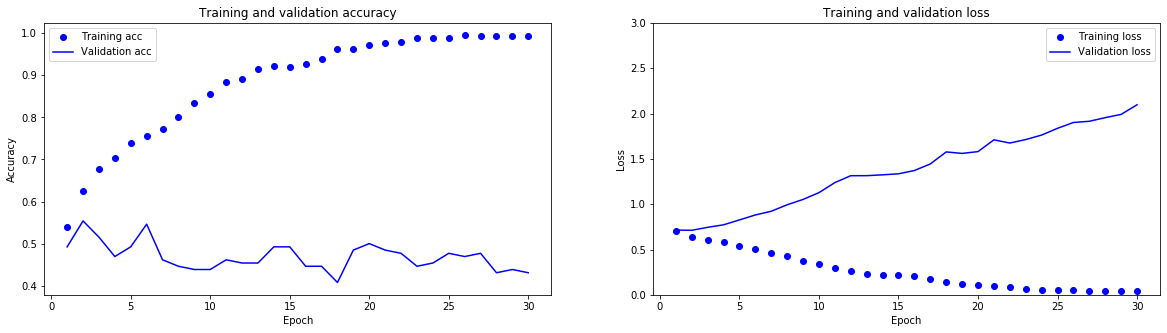

In [224]:
get_lstm(X_train, y_train, X_test, y_test, test_model=True)

# Model Builders

In [209]:
# Model imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, LSTM
from keras.optimizers import Adam, Nadam, RMSprop
from keras.losses import logcosh, binary_crossentropy
from keras.activations import relu, elu, sigmoid

### Analyzing last n fights using an LSTM

In [223]:
def get_lstm(x_train, y_train, x_val, y_val, test_model=False):
    model = Sequential()
    
    model.add(LSTM(50, 
                   input_shape=(10, 85),
                   recurrent_dropout=0.2)) #, return_sequences=True
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", 
                  optimizer=Adam(learning_rate=0.01), 
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                       validation_data=[x_val, y_val],
                       batch_size=64,
                       epochs=30,
                       verbose=1)
    
    if test_model:
        plot_training_results(history)
        model.summary()

    return history, model

### Analyzing last n fights using a Dense Neural Network

In [229]:
def get_dnn(x_train, y_train, x_val, y_val, params, test_model=False):
    
    model = Sequential()
    # Input Layer
    model.add(Dense(params["first_neuron"], 
                    activation=params['activation'], 
                    input_dim=X_train.shape[1]))
    
    model.add(Dropout(params['dropout']))
    
    # Hidden Layers
    hidden_layers(model, params, 1)
    
    # Output Layers
    model.add(Dense(1, activation=params['last_activation']))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])), 
                  metrics=['accuracy'])
                  
    history = model.fit(x_train, y_train,
                       validation_data=[x_val, y_val],
                       batch_size=params['batch_size'],
                       epochs=params['epochs'],
                       verbose=0)
    
    if test_model:
        model.summary()
        plot_training_results(history)
        

    return history, model

### Analyzing last n fights using a Convolutional Neural Network

In [225]:
def get_cnn(x_train, y_train, x_val, y_val, params, test_model=False):
    model = Sequential()
    
    # Convolutional Layers
    model.add(Conv1D(filters=params["num_filters"], kernel_size=params["kernel_size"], activation='relu', input_shape=(10, 85)))
    model.add(Conv1D(filters=params["num_filters"], kernel_size=params["kernel_size"], activation='relu'))
    model.add(Dropout(params['dropout']))
#     model.add(MaxPooling1D(pool_size=2))
    
    # Flatten Layers
    model.add(Flatten())
    model.add(Dense(params["flatten_layer"], activation='relu'))
#     model.add(Dense(params["flatten_layer"], activation='relu'))
    
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])), 
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                       validation_data=[x_val, y_val],
                       batch_size=params['batch_size'],
                       epochs=params['epochs'],
                       verbose=0)
    
    if test_model:
        plot_training_results(history)
        model.summary()

    return history, model

## Helper Functions

In [ ]:
def plot_training_results(history_obj):
    acc = history_obj.history['accuracy']
    val_acc = history_obj.history['val_accuracy']
    loss = history_obj.history['loss']
    val_loss = history_obj.history['val_loss']
    
    epochs = range(1, len(acc) + 1)

    fig, (accuracy_axis, loss_axis) = plt.subplots(1, 2, figsize=(20, 5))

    accuracy_axis.plot(epochs, acc, 'bo', label='Training acc')
    accuracy_axis.plot(epochs, val_acc, 'b', label='Validation acc')
    accuracy_axis.set_title('Training and validation accuracy')
    accuracy_axis.set_ylabel('Accuracy')
    accuracy_axis.set_xlabel('Epoch')
    accuracy_axis.legend()

    loss_axis.plot(epochs, loss, 'bo', label='Training loss')
    loss_axis.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_axis.set_title('Training and validation loss')
    loss_axis.set_ylim(0, 3)
    loss_axis.set_ylabel('Loss')
    loss_axis.set_xlabel('Epoch')
    loss_axis.legend()
    fig.show()

## Extract numerical and categorical columns

In [ ]:
# Get the first fight window and the first fight in that window
def get_column_types():
    num_cols = []
    cat_cols = []
    for fight in features[0][0]:
        feature_type = type(features[1][1][fight])
        if feature_type is not float and feature_type is not int:
            cat_cols.append(fight)
        else:
            num_cols.append(fight)
            
    return num_cols, cat_cols

In [ ]:
x, y = get_column_types()